In [8]:
import sys
import os

import scipy.io

In [9]:
mat = scipy.io.loadmat('NV_COS_data.mat')

In [10]:
os.chdir('TVGL')
os.getcwd()

'/Users/ericdong/Documents/Class/UPenn Senior Spring/ESE605/Final Project/TVGL'

In [151]:
import TVGL as tvgl
import numpy as np
import numpy.linalg as alg
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import networkx as nx
import math
import random

In [201]:
data = np.transpose(mat['NVdata'][0,0][0][0,0])
idx = random.sample(range(140), 12)
data = data[:,idx]
T, n = data.shape
data = data - np.mean(data, axis=0)
data.shape

(134, 12)

In [203]:
lamb = 2.5
beta = 12
thetaSet = tvgl.TVGL(data, n, lamb, beta, indexOfPenalty=3, verbose=False)

Use laplacian penalty function
11
lambda = 2.5, beta = 12


In [204]:
print thetaSet

[array([[ 0.32665948,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.1777888 ,  0.01467213,  0.        ,  0.01455727,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.01467213,  0.12724397,  0.        ,  0.        ,
        -0.0223425 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.01424835],
       [ 0.        ,  0.        ,  0.        ,  0.28193136, -0.02374113,
         0.        ,  0.00768725,  0.        ,  0.        , -0.01313153,
         0.        ,  0.        ],
       [ 0.        ,  0.01455727,  0.        , -0.02374113,  0.16212307,
         0.        ,  0.        ,  0.        ,  0.        , -0.05373064,
         0.01459222,  0.        ],
       [ 0.        ,  0.        , -0.0223425 ,  0.        ,  0.        ,
         0.41714621, 

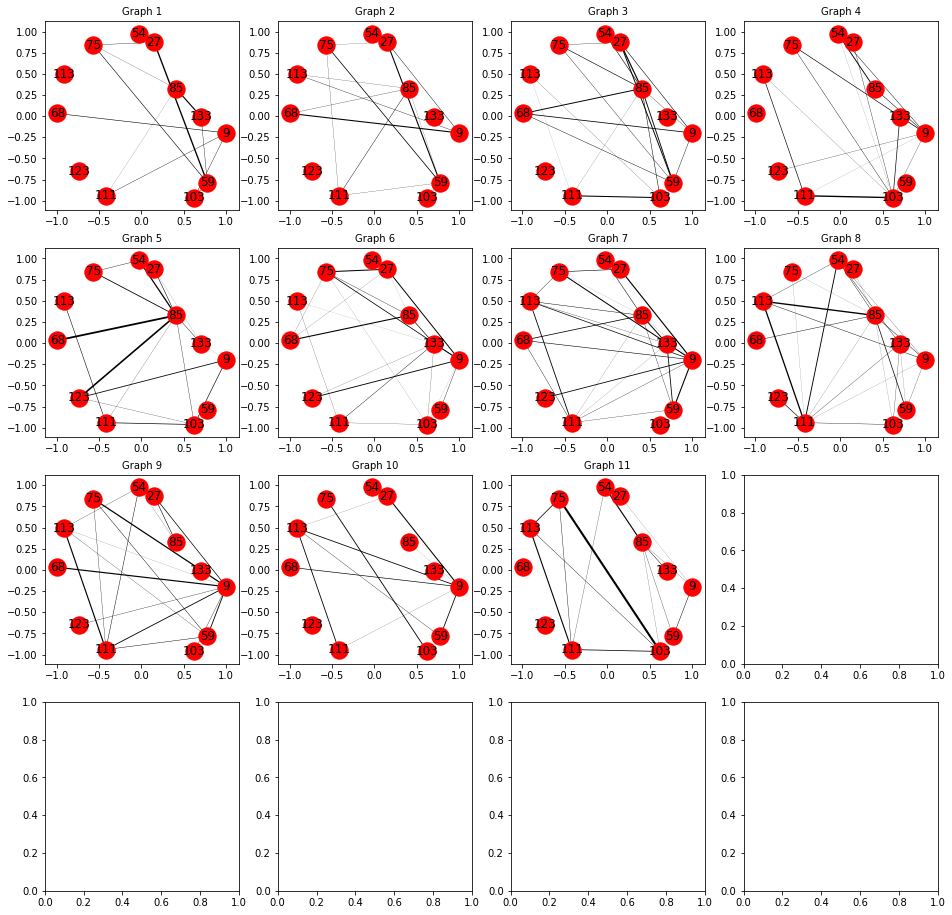

In [205]:
graphs_half = int(math.ceil(math.sqrt(len(thetaSet))))
fig, ax = plt.subplots(graphs_half, graphs_half, figsize=(16,16))
labels = {i:str(idx[i]+1) for i in range(n)}
pos = nx.spring_layout(nx.from_numpy_matrix(thetaSet[0]))
for j in range(len(thetaSet)):
    G = nx.from_numpy_matrix(thetaSet[j])
    edgewidth = [d['weight']*25 for (u,v,d) in G.edges(data=True)]
    nx.draw_networkx_nodes(G, pos, ax=ax[j/graphs_half, j%graphs_half])
    nx.draw_networkx_edges(G, pos, width=edgewidth, ax=ax[j/graphs_half, j%graphs_half])
    nx.draw_networkx_labels(G, pos, labels, ax=ax[j/graphs_half, j%graphs_half])
    ax[j/graphs_half, j%graphs_half].set_title('Graph %d' % (j+1), fontsize=10)
    
plt.show()

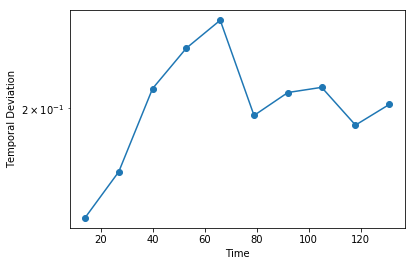

In [206]:
td = []
for i in range(len(thetaSet)):
    if i == 0:
        td.append(alg.norm(thetaSet[i], 'fro'))
    else:
        td.append(alg.norm(thetaSet[i]-thetaSet[i-1], 'fro'))
    
plt.semilogy(np.arange(1,T+1,T/len(thetaSet)+1)[1:], td[1:], '-o')
plt.xlabel('Time')
plt.ylabel('Temporal Deviation')
plt.show()

In [16]:
# Cov = np.array([[5, 1], [1, 7]])
# data = np.random.multivariate_normal(np.zeros(2), Cov, 50)

# data = np.genfromtxt('PaperCode/Datasets/finance.csv', delimiter=',')
# data = data[0:30,0:10]
# lamb = 2.5
# beta = 12
# lengthOfSlice = 10
# thetaSet = tvgl.TVGL(data, lengthOfSlice, lamb, beta, indexOfPenalty = 3, verbose=True)
# print thetaSet